In [1]:
from google.colab import drive
drive.mount('/gdrive')
import pathlib

import os

print(os.getcwd())
%cd ..
%cd gdrive
%cd My Drive
%cd PROJECT

print(os.getcwd())

Mounted at /gdrive
/content
/
/gdrive
/gdrive/My Drive
/gdrive/My Drive/PROJECT
/gdrive/My Drive/PROJECT


In [ ]:
!pip3 install pdf2image
!pip install easyocr

In [4]:
from PIL import Image
from google.colab.patches import cv2_imshow
import sys
from pdf2image import convert_from_path
import os
import cv2
import easyocr
import json

In [ ]:
# Path of the pdf
PDF_file = "/Sanskrit_Text.pdf"
  
'''
Part #1 : Converting PDF to images
'''
  
# Store all the pages of the PDF in a variable
pages = convert_from_path(os.getcwd()+PDF_file, 500)
  
# Counter to store images of each page of PDF to image
image_counter = 1
  
# Iterate through all the pages stored above
for page in pages:
  
    # Declaring filename for each page of PDF as JPG
    # For each page, filename will be:
    # PDF page 1 -> page_1.jpg
    # PDF page 2 -> page_2.jpg
    # PDF page 3 -> page_3.jpg
    # ....
    # PDF page n -> page_n.jpg
    filename = "page_"+str(image_counter)+".jpg"
      
    # Save the image of the page in system
    page.save(filename, 'JPEG')
  
    # Increment the counter to update filename
    image_counter = image_counter + 1
  

In [10]:
# Initialize OCR Reader function with hindi and english language

reader=easyocr.Reader(['hi','en'])

In [21]:
# 1. Load image
# 2. Perform OCR
# 3. Draw and save individual bounding boxes
# 4. Save bounding box information in .json file
# 5. Save full page image with all bounding boxes

for i in range(1,6):
  # Dictionary for storing bounding box information in json format
  boxfile={}
  # File name
  page='page_'+str(i)

  # Make directory to save resulting files of an individual page
  try:
    os.mkdir(os.getcwd()+'/'+page)
  except:
    pass
  
  # Load image
  img=cv2.imread(page+'.jpg')

  # Perform OCR
  output=reader.readtext(img,ycenter_ths=0.6,height_ths=100,width_ths =1000,slope_ths=100)

  # Loop through bounding boxes
  for j in range(len(output)):
    try:
      box=output[j][0]

      # Store bounding box information in dictionary
      boxfile['box'+str(j)]={"top_left":[int(vertex) for vertex in box[0]],"top_right": [int(vertex) for vertex in box[1]], "bottom_left": [int(vertex) for vertex in box[3]],"bottom_right": [int(vertex) for vertex in box[2]]}
      
      # Get top_left and bottom_right points of bounding box
      xmin,ymin=[int(min(idx)) for idx in zip(*box)]
      xmax,ymax=[int(max(idx)) for idx in zip(*box)]
      # crop_img = img[ymin:ymax, xmin:xmax]

      # Save individual cropped bounding box
      cv2.imwrite(page+'/box'+str(j)+'.jpg',img[ymin:ymax, xmin:xmax])
    except:
      continue
  
  # Draw all bounding boxes on image file
  for j in output:
    try:
      j=j[0]
      xmin,ymin=[int(min(idx)) for idx in zip(*j)]
      xmax,ymax=[int(max(idx)) for idx in zip(*j)]
      cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,0,0),2)
    except:
      continue
  # print(boxfile)

  # Save json file containing bounding box informatio
  with open(page+'/boundingbox.json', 'w') as outfile:
    json.dump(boxfile, outfile)

  # Save image with all bounding boxes
  cv2.imwrite(page+'/boundedtext.jpg',img)

{'box0': {'top_left': [831, 836], 'top_right': [1165, 836], 'bottom_left': [831, 964], 'bottom_right': [1165, 964]}, 'box1': {'top_left': [1020, 990], 'top_right': [2598, 990], 'bottom_left': [1020, 1118], 'bottom_right': [2598, 1118]}, 'box2': {'top_left': [1019, 1082], 'top_right': [3671, 1082], 'bottom_left': [1019, 1218], 'bottom_right': [3671, 1218]}, 'box3': {'top_left': [827, 1261], 'top_right': [1696, 1261], 'bottom_left': [827, 1382], 'bottom_right': [1696, 1382]}, 'box4': {'top_left': [1025, 1442], 'top_right': [2115, 1442], 'bottom_left': [1025, 1569], 'bottom_right': [2115, 1569]}, 'box5': {'top_left': [1019, 1554], 'top_right': [3822, 1554], 'bottom_left': [1019, 1677], 'bottom_right': [3822, 1677]}, 'box6': {'top_left': [838, 1758], 'top_right': [1155, 1758], 'bottom_left': [838, 1859], 'bottom_right': [1155, 1859]}, 'box7': {'top_left': [1019, 1909], 'top_right': [2705, 1909], 'bottom_left': [1019, 2050], 'bottom_right': [2705, 2050]}, 'box8': {'top_left': [1025, 2031], 

In [8]:
# Load image for OCR

img=cv2.imread('page_1.jpg')

In [11]:
# Perform OCR on the image with desired parameters

output=reader.readtext(img,ycenter_ths=0.6,height_ths=100,width_ths =1000,slope_ths=100)

In [12]:
# Printing the output of OCRed results

print(output)

[([[1769, 1289], [2502, 1289], [2502, 1529], [1769, 1529]], 'प्रकीर्णकम्', 0.7166416441637611), ([[1907, 1804], [2337, 1804], [2337, 1916], [1907, 1916]], 'व्यस्तविधिः', 0.5790258925706824), ([[1710, 1925], [2538, 1925], [2538, 2027], [1710, 2027]], '(Inverse operations )', 0.5930580782722029), ([[829, 2075], [1711, 2075], [1711, 2197], [829, 2197]], 'व्यस्तविधौ करणसूत्रं वृत्तद्वयम्', 0.5755769671479998), ([[1025, 2241], [2278, 2241], [2278, 2368], [1025, 2368]], 'छेदं गुणं गुणं छेदं वर्गं मूलं पदं कृतिम्', 0.4720300951416184), ([[1026, 2340], [2629, 2340], [2629, 2500], [1026, 2500]], 'ऋणं स्वं स्वमृणं कुर्यात् दृश्ये राशिप्रसिद्धये Il४८II', 0.5194407727901889), ([[1028, 2490], [2417, 2490], [2417, 2628], [1028, 2628]], 'अथ स्वांशाधिकोने तु लवाढ्योनो३२ हरो हरः', 0.4984498925337128), ([[1019, 2597], [3658, 2597], [3658, 2754], [1019, 2754]], 'अंशस्त्वविकृतस्तत्र विलोमे शेषमुक्तवत् I४९II अनुष्टुभ्', 0.47219416816282955), ([[836, 2785], [1161, 2785], [1161, 2911], [836, 2911]], 'अत्रोद्

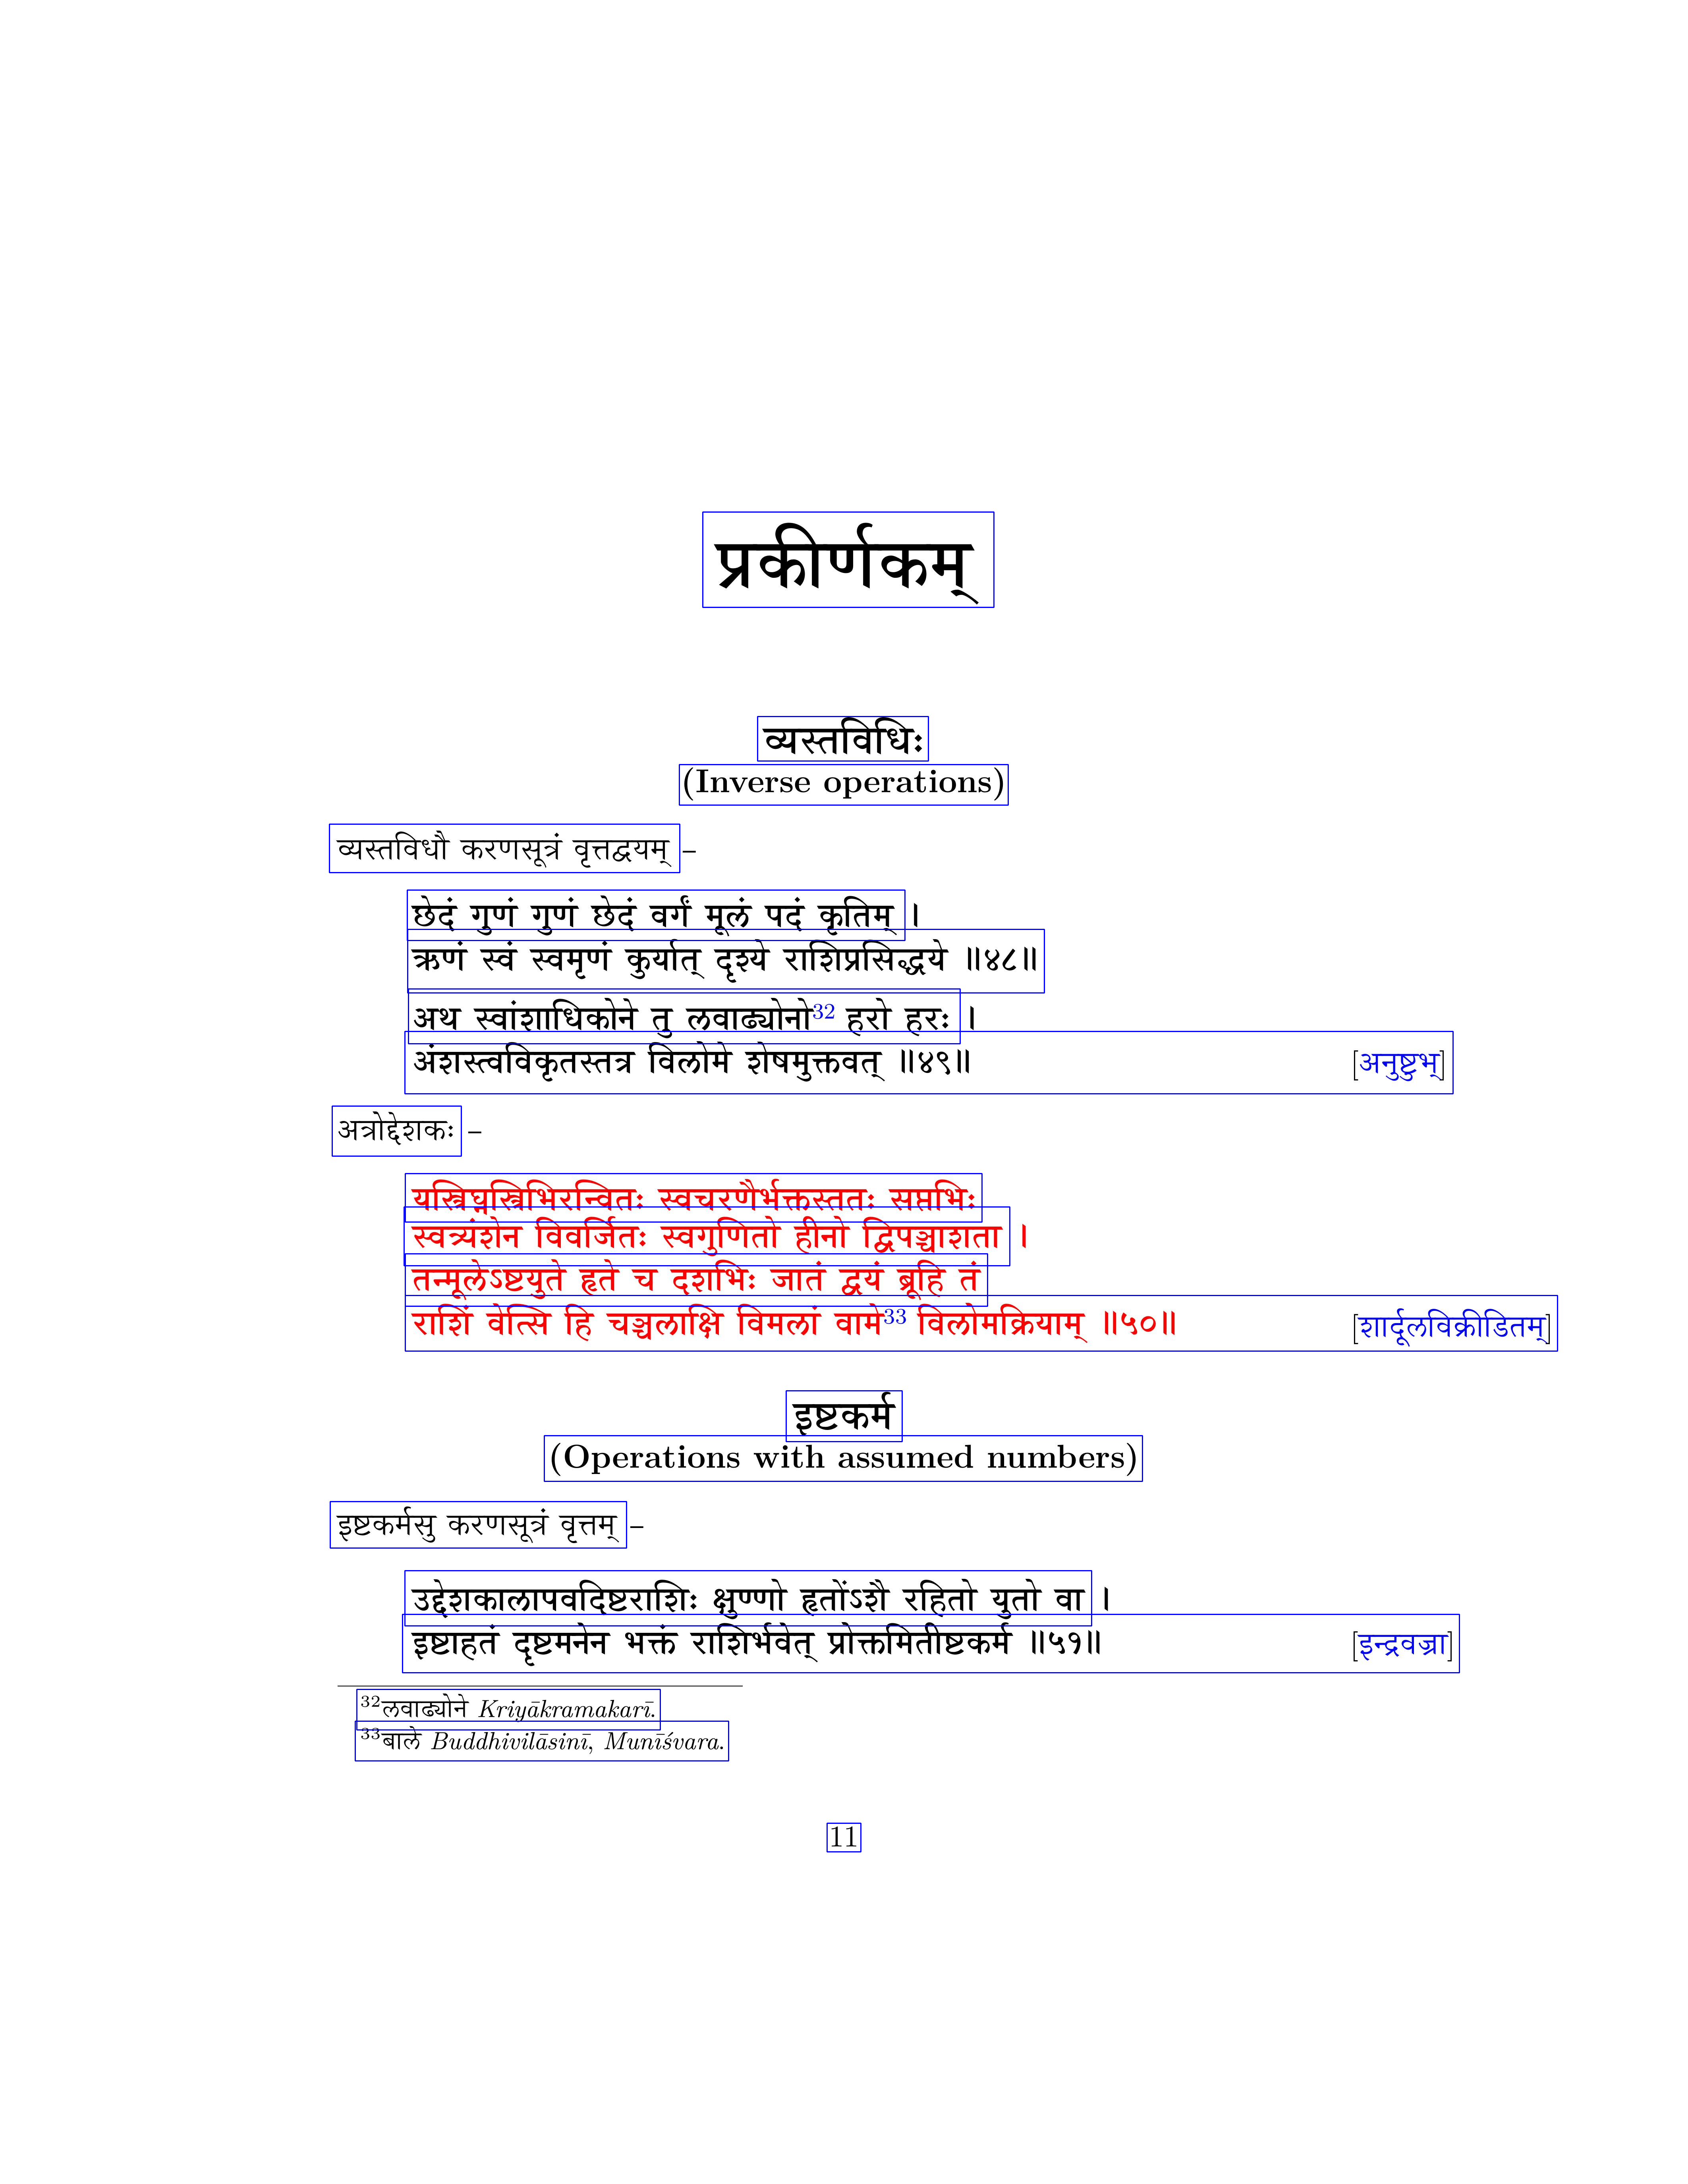

In [133]:
# Creating bounding boxes on lines of text

for i in output:
  try:
    i=i[0]
    # Get top_left and bottom_right points of bounding box
    xmin,ymin=[int(min(idx)) for idx in zip(*i)]
    xmax,ymax=[int(max(idx)) for idx in zip(*i)]
    # Draw the bounding box
    cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,0,0),2)
  except:
    continue

# Show the image with drawn bounding boxes
cv2_imshow(img)  